# TP &mdash; Restricted Boltzmann Machines

**Auteurs:**

* Javier Andres Boada Martinez
* Kevin Alexandro Sanchez Diaz
* Yevhenii Sielskyi

## Chargement de données

In [1]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

alphadigits = scipy.io.loadmat('data/binaryalphadigs.mat')

## Analyse Exploratoire des Données 

In [2]:
# 10 digits and 26 handwritten letters (A-Z),
# 39 examples of each class: 
print(f"There are {alphadigits['dat'].shape[0]} different character classes, "
      f"{alphadigits['dat'].shape[1]} examples each.")

There are 36 different character classes, 39 examples each.


In [3]:
# The dimensions of each image:
print(f"The size of each binary image is: {alphadigits['dat'][0, 0].shape}")

The size of each binary image is: (20, 16)


Training data examples:

Class 6:


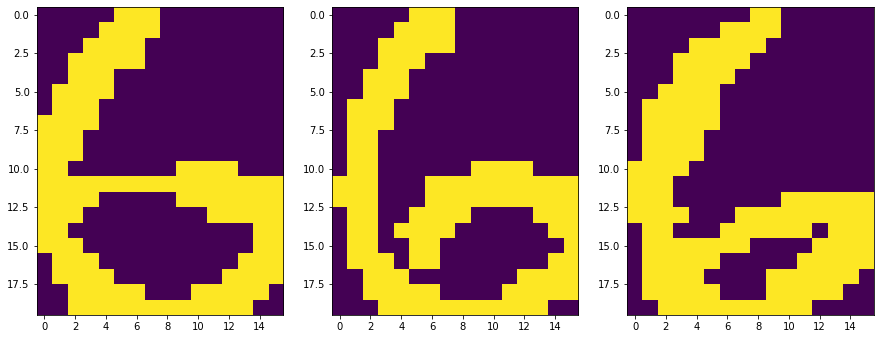


Class 7:


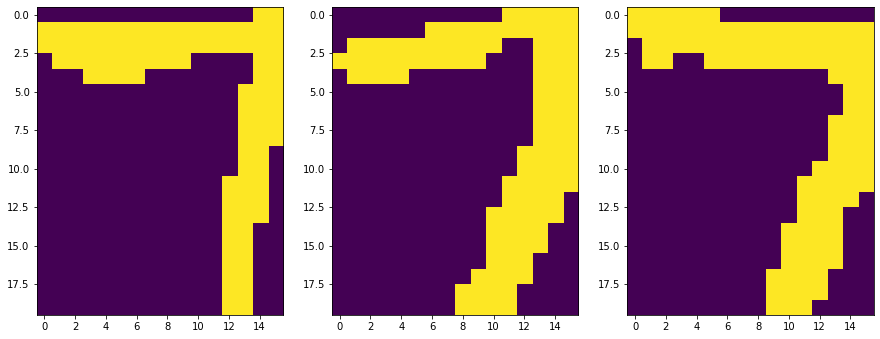


Class 8:


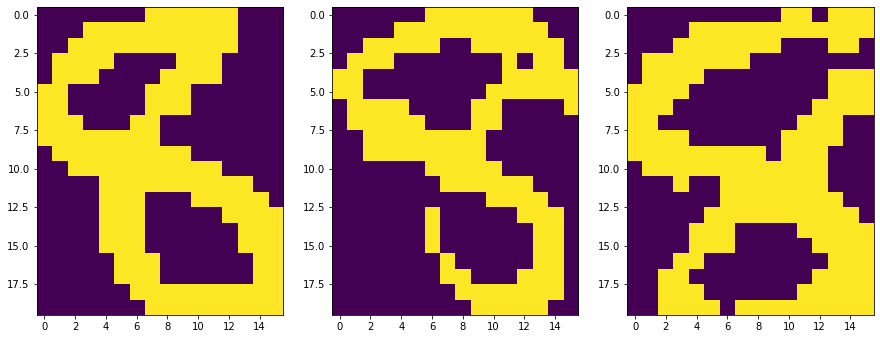


Class 10:


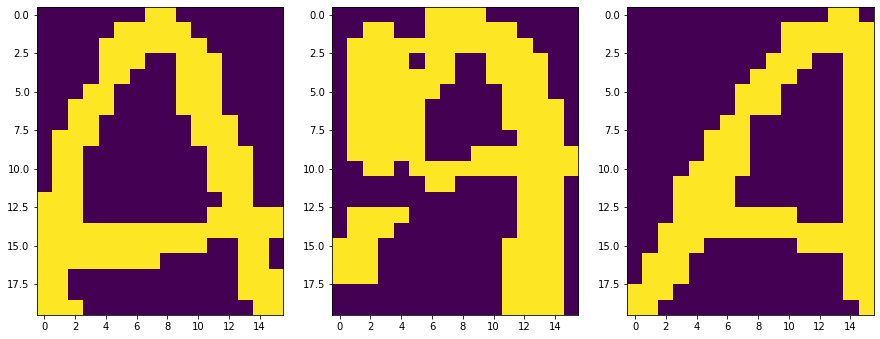


Class 16:


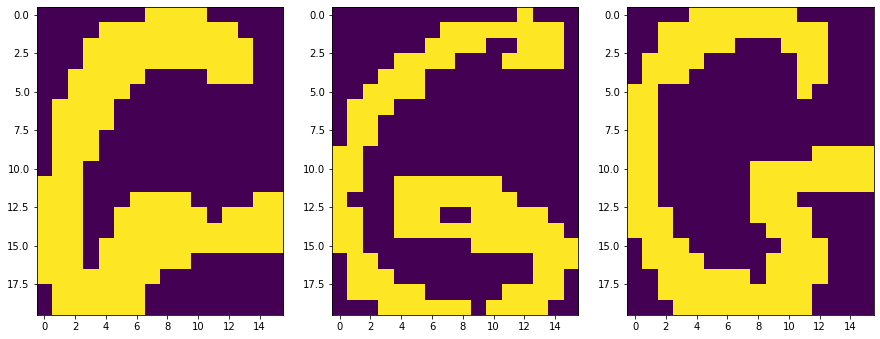

In [4]:
# Number of random classes to output:
nb_classes_to_show = 5
# Examples per class to show:
nb_samples_per_class = 3

# Images to show in one row:
nb_imgs_per_row = 3
# Number of rows:
nb_rows = nb_samples_per_class // nb_imgs_per_row + 1 \
            if nb_samples_per_class % nb_imgs_per_row \
            else nb_samples_per_class // nb_imgs_per_row

# Randomly choose some classes (their indices):
class_indices = np.sort(np.random.choice(
    range(alphadigits['dat'].shape[0]),
    size=nb_classes_to_show
))

# Output some images:
print("Training data examples:")
for class_index in class_indices:
    print(f"\nClass {class_index}:")

    # Choose random samples:
    example_indices = np.random.choice(
        range(alphadigits['dat'].shape[1]),
        size=nb_samples_per_class
    )

    # Output chosen class images:
    plt.figure(figsize=(5 * nb_imgs_per_row, 6 * nb_rows))
    for i, image in enumerate(alphadigits['dat'][class_index, example_indices], 1):
        plt.subplot(nb_rows, nb_imgs_per_row, i)
        plt.imshow(image)
    plt.show()

## Échantillonnage des données

In [5]:
def read_alpha_digits(data, indices):
    dataset = []
    
    for idx in indices:
        dataset += [image.reshape(-1) for image in data[idx]]

    return np.array(dataset)

In [6]:
# Character classes to learn:
train_classes = [10, 11]

In [7]:
dataset = read_alpha_digits(alphadigits['dat'], train_classes)

In [8]:
dataset.shape

(78, 320)

## Entraînement

In [9]:
from rbm import RBM

In [10]:
# Hyperparameters:
HIDDEN_UNITS = 200
LEARNING_RATE = 1E-2

EPOCHS = 500
BATCH_SIZE = 10

In [11]:
rbm = RBM(dataset.shape[-1], HIDDEN_UNITS)

In [12]:
rbm.train(dataset, lr=LEARNING_RATE, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1:
Batch 8: [====================>]. Batch MSE: 0.44805
Epoch average MSE: 0.46737

Epoch 2:
Batch 8: [====================>]. Batch MSE: 0.41055
Epoch average MSE: 0.43265

Epoch 3:
Batch 8: [====================>]. Batch MSE: 0.41602
Epoch average MSE: 0.41646

Epoch 4:
Batch 8: [====================>]. Batch MSE: 0.43242
Epoch average MSE: 0.42003

Epoch 5:
Batch 8: [====================>]. Batch MSE: 0.40703
Epoch average MSE: 0.41783

Epoch 6:
Batch 8: [====================>]. Batch MSE: 0.41641
Epoch average MSE: 0.41416

Epoch 7:
Batch 8: [====================>]. Batch MSE: 0.44531
Epoch average MSE: 0.41699

Epoch 8:
Batch 8: [====================>]. Batch MSE: 0.40820
Epoch average MSE: 0.42216

Epoch 9:
Batch 8: [====================>]. Batch MSE: 0.42266
Epoch average MSE: 0.41748

Epoch 10:
Batch 8: [====================>]. Batch MSE: 0.40586
Epoch average MSE: 0.40897

Epoch 11:
Batch 8: [====================>]. Batch MSE: 0.39883
Epoch average MSE: 0.41860

Epoch 12

## Génération des images

In [13]:
# Image generation parameters:
ITER_GIBBS = 100
NB_IMAGES = 5

In [14]:
test_images = rbm.generate_images(iter_gibbs=ITER_GIBBS, nb_images=NB_IMAGES)

Generated images:


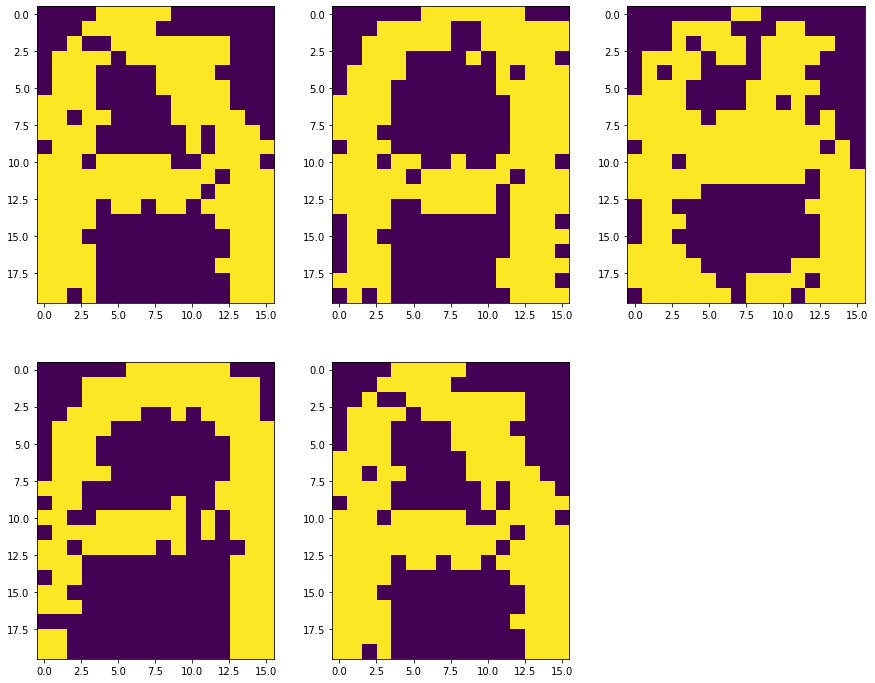

In [15]:
# Number of rows:
nb_rows = NB_IMAGES // nb_imgs_per_row + 1 \
            if NB_IMAGES % nb_imgs_per_row \
            else NB_IMAGES // nb_imgs_per_row

# Output generated images:
print("Generated images:")
plt.figure(figsize=(5 * nb_imgs_per_row, 6 * nb_rows))
for i, image in enumerate(test_images, 1):
    plt.subplot(nb_rows, nb_imgs_per_row, i)
    plt.imshow(image)
plt.show()

## Expériences

## MNIST

In [16]:
# load MNIST data - handwritten digits:
mnist = scipy.io.loadmat('data/mnist_all.mat')

# MNIST image size:
mnist_img_size = (28, 28)

In [17]:
# Merge training and test data for each class:
for class_index in range(10):
    mnist['train' + str(class_index)] = np.concatenate(
        (mnist['train' + str(class_index)],
        mnist['test' + str(class_index)]), axis=0
    )

In [22]:
# Character classes to learn:
train_classes = [5]

# Create a MNIST training dataset:
mnist_dataset = np.concatenate(
    [mnist['train' + str(class_index)] for class_index in train_classes],
    axis=0
)

# Binarise data:
mnist_dataset = np.where(mnist_dataset > 0, 1, 0)

In [28]:
# Create another RBM:
mnist_rbm = RBM(mnist_dataset.shape[-1], HIDDEN_UNITS)

# Train RBM on the MNIST data:
mnist_rbm.train(
    mnist_dataset, lr=LEARNING_RATE,
    epochs=EPOCHS, batch_size=BATCH_SIZE * 10
)

Epoch 1:
Batch 64: [====================>]. Batch MSE: 0.17553
Epoch average MSE: 0.23699

Epoch 2:
Batch 64: [====================>]. Batch MSE: 0.18181
Epoch average MSE: 0.18613

Epoch 3:
Batch 64: [====================>]. Batch MSE: 0.15944
Epoch average MSE: 0.16313

Epoch 4:
Batch 64: [====================>]. Batch MSE: 0.15061
Epoch average MSE: 0.15445

Epoch 5:
Batch 64: [====================>]. Batch MSE: 0.15031
Epoch average MSE: 0.14852

Epoch 6:
Batch 64: [====================>]. Batch MSE: 0.12991
Epoch average MSE: 0.14141

Epoch 7:
Batch 64: [====================>]. Batch MSE: 0.14551
Epoch average MSE: 0.13556

Epoch 8:
Batch 64: [====================>]. Batch MSE: 0.11951
Epoch average MSE: 0.13134

Epoch 9:
Batch 64: [====================>]. Batch MSE: 0.12932
Epoch average MSE: 0.12855

Epoch 10:
Batch 64: [====================>]. Batch MSE: 0.13579
Epoch average MSE: 0.12646

Epoch 11:
Batch 64: [====================>]. Batch MSE: 0.11205
Epoch average MSE: 0.1243

In [29]:
test_images = mnist_rbm.generate_images(
    iter_gibbs=ITER_GIBBS * 5,
    nb_images=NB_IMAGES,
    img_size=mnist_img_size    
)

Generated images:


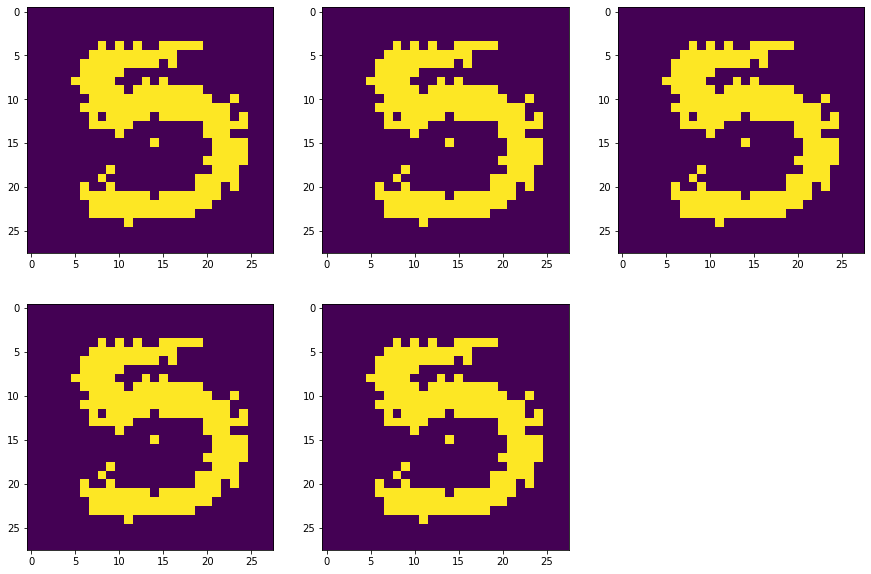

In [30]:
# Number of rows:
nb_rows = NB_IMAGES // nb_imgs_per_row + 1 \
            if NB_IMAGES % nb_imgs_per_row \
            else NB_IMAGES // nb_imgs_per_row

# Output generated images:
print("Generated images:")
plt.figure(figsize=(5 * nb_imgs_per_row, 5 * nb_rows))
for i, image in enumerate(test_images, 1):
    plt.subplot(nb_rows, nb_imgs_per_row, i)
    plt.imshow(image)
plt.show()